<a href="https://colab.research.google.com/github/Kraw-ller/Cifar-10-CNN-Model/blob/main/Cifar10_Wameedh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 16s 0us/step


In [3]:
# Checking the number of rows (records) and columns (features)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
# Checking the number of unique classes 
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [5]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

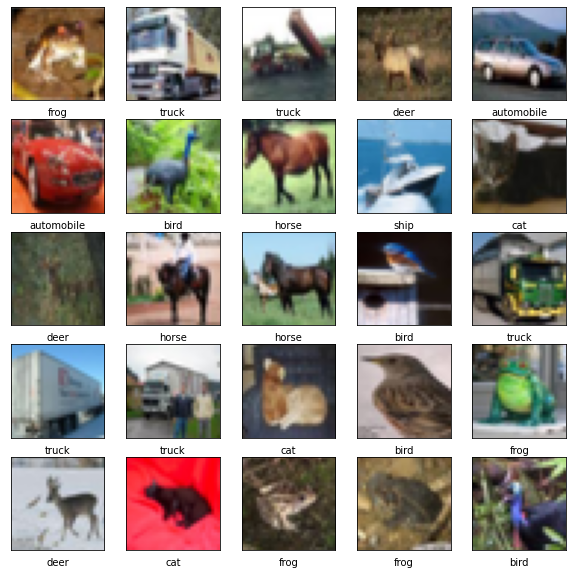

In [6]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [7]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255 

# One hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [22]:
# Creating a sequential model and adding layers to it

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='swish', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='swish'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='swish'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='swish'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='swish'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='swish'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_14 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_15 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [23]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [24]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=50,
                    validation_data=(test_images, test_labels))

Epoch 1/50
782/782 [==============================] - 18s 17ms/step - loss: 1.6809 - accuracy: 0.4213 - val_loss: 1.1588 - val_accuracy: 0.5901
Epoch 2/50
782/782 [==============================] - 13s 16ms/step - loss: 1.1349 - accuracy: 0.6003 - val_loss: 1.0037 - val_accuracy: 0.6461
Epoch 3/50
782/782 [==============================] - 13s 16ms/step - loss: 0.9594 - accuracy: 0.6694 - val_loss: 0.8328 - val_accuracy: 0.7144
Epoch 4/50
782/782 [==============================] - 13s 16ms/step - loss: 0.8699 - accuracy: 0.7004 - val_loss: 0.8220 - val_accuracy: 0.7196
Epoch 5/50
782/782 [==============================] - 13s 16ms/step - loss: 0.7955 - accuracy: 0.7245 - val_loss: 0.7098 - val_accuracy: 0.7587
Epoch 6/50
782/782 [==============================] - 13s 16ms/step - loss: 0.7448 - accuracy: 0.7459 - val_loss: 0.7293 - val_accuracy: 0.7493
Epoch 7/50
782/782 [==============================] - 12s 15ms/step - loss: 0.6983 - accuracy: 0.7649 - val_loss: 0.6747 - val_accuracy:

In [25]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 12s 16ms/step - loss: 0.3319 - accuracy: 0.8877 - val_loss: 0.4694 - val_accuracy: 0.8579
Epoch 2/10
782/782 [==============================] - 13s 16ms/step - loss: 0.3234 - accuracy: 0.8914 - val_loss: 0.4417 - val_accuracy: 0.8652
Epoch 3/10
782/782 [==============================] - 12s 16ms/step - loss: 0.3230 - accuracy: 0.8897 - val_loss: 0.4358 - val_accuracy: 0.8672
Epoch 4/10
782/782 [==============================] - 13s 16ms/step - loss: 0.3188 - accuracy: 0.8926 - val_loss: 0.4439 - val_accuracy: 0.8666
Epoch 5/10
782/782 [==============================] - 13s 16ms/step - loss: 0.3215 - accuracy: 0.8924 - val_loss: 0.4651 - val_accuracy: 0.8599
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 0.3162 - accuracy: 0.8925 - val_loss: 0.4662 - val_accuracy: 0.8616
Epoch 7/10
782/782 [==============================] - 12s 15ms/step - loss: 0.3107 - accuracy: 0.8950 - val_loss: 0.4303 - val_accuracy:

In [26]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 13s 17ms/step - loss: 0.3096 - accuracy: 0.8951 - val_loss: 0.4186 - val_accuracy: 0.8713
Epoch 2/10
782/782 [==============================] - 13s 16ms/step - loss: 0.3117 - accuracy: 0.8937 - val_loss: 0.5140 - val_accuracy: 0.8417
Epoch 3/10
782/782 [==============================] - 12s 15ms/step - loss: 0.3027 - accuracy: 0.8980 - val_loss: 0.4352 - val_accuracy: 0.8667
Epoch 4/10
782/782 [==============================] - 13s 17ms/step - loss: 0.2993 - accuracy: 0.8982 - val_loss: 0.4407 - val_accuracy: 0.8677
Epoch 5/10
782/782 [==============================] - 12s 16ms/step - loss: 0.3066 - accuracy: 0.8955 - val_loss: 0.5065 - val_accuracy: 0.8502
Epoch 6/10
782/782 [==============================] - 13s 16ms/step - loss: 0.2926 - accuracy: 0.9021 - val_loss: 0.4417 - val_accuracy: 0.8674
Epoch 7/10
782/782 [==============================] - 12s 15ms/step - loss: 0.2939 - accuracy: 0.9002 - val_loss: 0.4360 - val_accuracy:

Text(0.5, 1.0, 'Loss Curves')

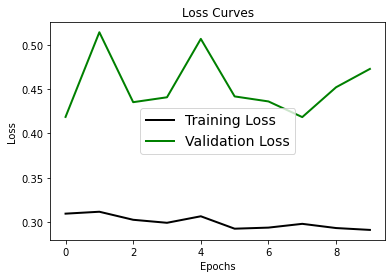

In [28]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

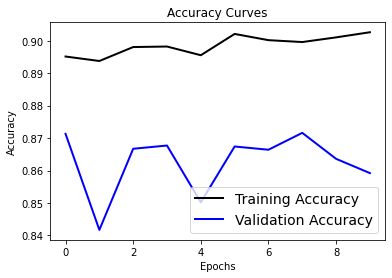

In [29]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [30]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 [==============================] - 1s 3ms/step
[[1.83016073e-05 2.30379192e-06 1.58063631e-04 ... 5.91204771e-05
  9.21581795e-06 6.76812215e-06]
 [2.82366469e-04 1.11948419e-03 1.57835839e-05 ... 4.30308637e-06
  9.98303175e-01 1.43399913e-04]
 [3.03242123e-03 3.25026482e-01 6.69126966e-05 ... 4.60400734e-05
  6.64572358e-01 3.89983575e-03]
 ...
 [4.10870871e-06 9.07839330e-06 7.01658486e-04 ... 5.95468737e-04
  3.80782831e-06 3.17381364e-06]
 [2.14516142e-04 9.96960342e-01 1.17918695e-04 ... 7.10456061e-06
  4.50963053e-05 8.17146443e-04]
 [1.00828129e-05 4.43009776e-06 5.88212497e-05 ... 9.98435676e-01
  1.91325648e-06 8.99019778e-06]]
[3 8 8 ... 5 1 7]


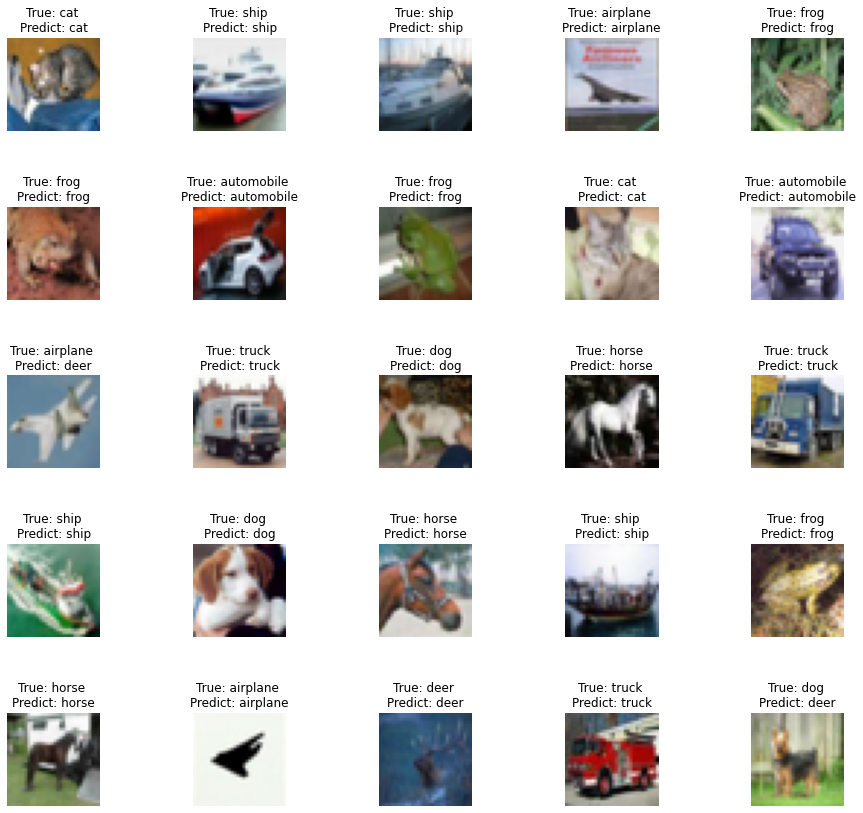

In [31]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)